# Tabular models

In [1]:
from fastai import *
from fastai.tabular import *

Tabular data should be in a Pandas `DataFrame`.

In [51]:
path = untar_data(URLs.ADULT_SAMPLE)
path
df = pd.read_csv(path/'adult.csv')

In [52]:
path

PosixPath('/home/ubuntu/.fastai/data/adult_sample')

In [26]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race','sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]

In [23]:
df.iloc[:10]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k
5,20,Private,63210,HS-grad,9.0,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,15,United-States,<50k
6,49,Private,44434,Some-college,10.0,Divorced,NaN,Other-relative,White,Male,0,0,35,United-States,<50k
7,37,Private,138940,11th,7.0,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<50k
8,46,Private,328216,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>=50k
9,36,Self-emp-inc,216711,HS-grad,NaN,Married-civ-spouse,NaN,Husband,White,Male,99999,0,50,?,>=50k


In [27]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [28]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [50]:
data.show_batch(rows=1)

workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,education-num_na,age,fnlwgt,education-num,target
Private,Masters,Never-married,Exec-managerial,Not-in-family,Black,Female,0,0,45,United-States,False,-0.7760,-0.3168,1.5334,<50k


In [31]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [32]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 5)
    (5): Embedding(6, 4)
    (6): Embedding(3, 3)
    (7): Embedding(120, 23)
    (8): Embedding(93, 20)
    (9): Embedding(95, 20)
    (10): Embedding(43, 13)
    (11): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=121, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU(inplace)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [19]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 5)
    (5): Embedding(6, 4)
    (6): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=42, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU(inplace)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [18]:
model = TabularModel(emb_szs={}, n_cont = 3, out_sz = 1, layers=[200,100])

TypeError: 'NoneType' object is not iterable

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


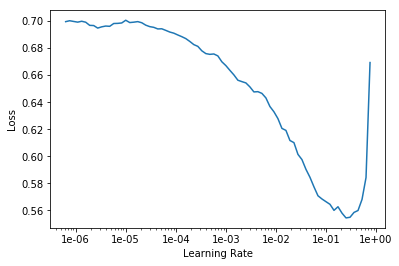

In [34]:
learn.recorder.plot()

In [35]:
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.294502,0.349500,0.845000,00:04


In [40]:
learn.show_results(rows=10)

workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,education-num_na,age,fnlwgt,education-num,target,prediction
Private,Some-college,Divorced,Handlers-cleaners,Unmarried,White,Female,0,0,40,United-States,True,0.4701,-0.8793,-0.0312,<50k,<50k
Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,60,United-States,True,0.5434,0.0290,-0.0312,>=50k,>=50k
Private,Assoc-voc,Divorced,#na#,Not-in-family,White,Male,0,0,38,United-States,True,-0.1896,1.7704,-0.0312,<50k,<50k
Federal-gov,Bachelors,Never-married,Tech-support,Not-in-family,White,Male,0,0,45,United-States,True,-0.9959,-1.3242,-0.0312,<50k,<50k
Private,Bachelors,Married-civ-spouse,#na#,Husband,White,Male,0,0,40,United-States,True,-0.1163,-0.2389,-0.0312,<50k,<50k
Private,HS-grad,Married-civ-spouse,Sales,Husband,Black,Male,0,0,40,United-States,False,0.6166,-0.3887,-0.4224,<50k,<50k
Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,50,United-States,True,-0.4828,-1.4545,-0.0312,<50k,<50k
Private,11th,Never-married,#na#,Unmarried,White,Male,0,0,40,United-States,False,-1.0692,0.3190,-1.2046,<50k,<50k
?,10th,Widowed,?,Other-relative,Asian-Pac-Islander,Female,0,0,1,China,True,2.6690,0.6715,-0.0312,<50k,<50k
Private,Masters,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,50,South,True,1.5695,-0.9834,-0.0312,>=50k,<50k


In [43]:
learn.summary()

Layer (type)         Output Shape         Param #    Trainable 
Embedding            [6]                  60         True      
______________________________________________________________________
Embedding            [8]                  136        True      
______________________________________________________________________
Embedding            [5]                  40         True      
______________________________________________________________________
Embedding            [8]                  128        True      
______________________________________________________________________
Embedding            [5]                  35         True      
______________________________________________________________________
Embedding            [4]                  24         True      
______________________________________________________________________
Embedding            [3]                  9          True      
______________________________________________________________

## Inference

In [44]:
interp = ClassificationInterpretation.from_learner(learn)

In [48]:
interp.most_confused(min_val=0.2)

[('>=50k', '<50k', 30), ('<50k', '>=50k', 1)]

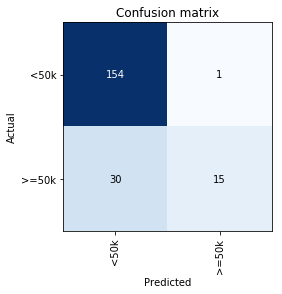

In [49]:
interp.plot_confusion_matrix()

In [41]:
row = df.iloc[0]
row

age                                49
workclass                     Private
fnlwgt                         101320
education                  Assoc-acdm
education-num                      12
marital-status     Married-civ-spouse
occupation                        NaN
relationship                     Wife
race                            White
sex                            Female
capital-gain                        0
capital-loss                     1902
hours-per-week                     40
native-country          United-States
salary                          >=50k
Name: 0, dtype: object

In [39]:
learn.predict(row)

(Category >=50k, tensor(1), tensor([0.0105, 0.9895]))